---
layout: default
title: "Preparatory concepts"
categories: introduction
permalink: /ML1/
order: 1
comments: true
---

In [64]:
%pylab --no-import-all inline
import pandas as pd
from graphviz import Digraph
from mpl_flow import Flow
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"

Populating the interactive namespace from numpy and matplotlib


# Derivatives and computation graph
Derivatives are a fundamental concept in machine learning, they are the building block of optimization and having an understanding of what a derivative is vastly helps in understanding how optimization and gradient descent work.

## Derivative
Suppose we have a function $f(a) = 3a$, then $f(2) = 6$. If we take a small increment of $a$ ($a'$) we will have $f(2.001) = 6.003$. Connecting $a$ and $a'$ forms a triangle, with an height ($a'-a$) and a width ($f(a') - f(a)$) (<a href="#fig:derivative">figure below</a>).

The slope $\frac{\text{height} }{\text{width}}=3$ so we say that the derivative of $f(a)$ at the point $a=2$ is $3$. Height and width are the the vertical and horizontal distances and the slope is also expressed as $\frac{df(a)}{da}$ or as $\frac{d}{da}f(a)$. The reason why $a'$ doesn't appear in this representation is because, formally, the derivative is calculated at a very small increment of $a$ such as $a' \approx a$.

For a straight line (<a href="#fig:derivative">figure below</a>, panel A) the derivative is constant along the whole line.

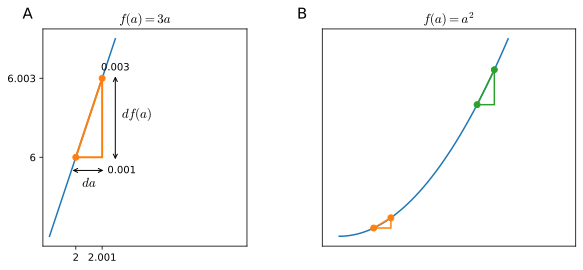

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax, ax2 = axes
xmax = 5
x = np.linspace(0, xmax)
y = 3*x
ax.plot(x, y)
ax.set_aspect('equal')
ax.set_xlim(-xmax*.1, xmax*3)
ax.plot([2, 4, 4, 2], [6, 12, 6, 6], marker='o', lw=2, markevery=[0, 1])

ax.set_xticks([2, 4])
ax.set_xticklabels([2, 2.001])
ax.set_yticks([6, 12])
ax.set_yticklabels([6, 6.003])
ax.set_xlabel('')
ax.annotate('0.001', (1.6, 5), xytext=(4.4, 5), va='center',  arrowprops={'arrowstyle': '<->'})
ax.annotate('0.003', (5, 5.7), xytext=(5, 12.6), ha='center',  arrowprops={'arrowstyle': '<->'});
ax.text(5.5, 9, '$df(a)$', fontsize=13)
ax.text(3, 4.5, '$da$', va='top', ha='center', fontsize=13)
ax.set_title('$f(a)=3a$', fontsize=13)
ax.text(-0.1, 1.1, 'A', transform=ax.transAxes,
  fontsize=15, va='top')

ax2.plot(x, x**2)
ax2.set_xlim(-xmax*.1, xmax*1.4)

x1, x2 = 10, 15
dx = np.r_[x[[x1, x2]], x[x2], x[x1]]
dy = np.r_[x[[x1, x2]], x[x1], x[x1]]**2
ax2.plot(dx, dy, marker='o', markevery=[0, 1])

x1, x2 = 40, 45
dx = np.r_[x[[x1, x2]], x[x2], x[x1]]
dy = np.r_[x[[x1, x2]], x[x1], x[x1]]**2
ax2.plot(dx, dy, marker='o', markevery=[0, 1])
ax2.set_title('$f(a)=a^2$', fontsize=13)
ax2.set_xticks([])
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes,
  fontsize=15, va='top');

<i id="fig:derivative">The concept of derivative applied to a straight line (A), where the derivative is constant along the whole length of the function; and to a non-linear function (B), where the derivative changes based on the value of $a$.</i>

## Computational graph
The computational graph explains the forward- and backward- propagation (as to say the flow of the computation) that takes place in the training of a neural network. 

To illustrate the computation graph let's use a simpler example than a full blown neural network, let's say that we are writing a function $J(a, b, c) = 3(a+bc)$. In order to compute this function there are three steps: 

1. $u = bc$
2. $v = a + u$
3. $J=3v$

We can draw these steps in a computational graph (<a href="#compgraph">figure below</a>)

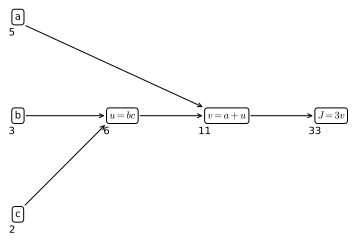

In [66]:
f = Flow()
f.node('a', xlabel=5)
f.node('b', travel='s', connect=False, xlabel=3)
f.node('c', travel='s', connect=False, xlabel=2)
f.node('u', label='$u=bc$', xlabel=6, startpoint='b')
f.node('v', label='$v=a+u$', xlabel=11)
f.node('j', label='$J=3v$', xlabel=33)
f.edge('c', 'u')
f.edge('a', 'v')

<i id="compgraph">Computational graph showing the flow of a very simple process</i>

Suppose we want to calculate $\frac{dJ}{dv}$ ( in other words if we change the value $v$ of a little amount how would the value of $J$ change?). 

* $J = 3v$
* $v = 11 \to 3.001$
* $J = 33 \to 33.003$

So 

$$\frac{dJ}{dv}=\frac{0.003}{0.001}=3$$

In the terminology of backpropagation if we want to compute $\frac{dJ}{dv}$ we take one step back from $J$ to $v$

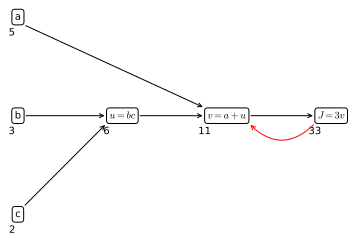

In [67]:
f = Flow()
f.node('a', xlabel=5)
f.node('b', travel='s', connect=False, xlabel=3)
f.node('c', travel='s', connect=False, xlabel=2)
f.node('u', label='$u=bc$', xlabel=6, startpoint='b')
f.node('v', label='$v=a+u$', xlabel=11)
f.node('j', label='$J=3v$', xlabel=33)
f.edge('c', 'u')
f.edge('a', 'v')
f.edge('j', 'v', headport='se', tailport='sw', arrowprops=dict(color='red', connectionstyle='arc3,rad=.5'))
# dot2.edge('j', 'v', headport='s', tailport='s', color='red')


We now want to calculate $\frac{dJ}{da}$, in other words the change of value $J$ when $a$ changes

* $a = 5 \to 5.001$
* $v = 11 \to 11.001$
* $J = 33 \to 33.003$

So, once again

$$\frac{dJ}{da}=\frac{0.003}{0.001}=3$$

Where the net change is given by 

$$
\frac{dJ}{da}=\frac{dJ}{dv}\frac{dv}{da}
$$


In calculus this is called the **chain rule** where $a$ affects $v$ that affects $J$ ($a\to v \to J$). So that the change of $J$ when $a$ is given by the product $\frac{dJ}{dv}\frac{dv}{da}$. This illustrates how having computed $\frac{dJ}{dv}$ helps in calculating $\frac{dJ}{da}$

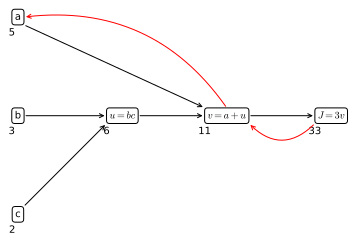

In [68]:
f = Flow()
f.node('a', xlabel=5)
f.node('b', travel='s', connect=False, xlabel=3)
f.node('c', travel='s', connect=False, xlabel=2)
f.node('u', label='$u=bc$', xlabel=6, startpoint='b')
f.node('v', label='$v=a+u$', xlabel=11)
f.node('j', label='$J=3v$', xlabel=33)
f.edge('c', 'u')
f.edge('a', 'v')
f.edge('j', 'v', headport='se', tailport='sw', arrowprops=dict(color='red', connectionstyle='arc3,rad=.5'))
f.edge('v', 'a', headport='e', tailport='n', arrowprops=dict(color='red', connectionstyle='arc3,rad=-.3'))

# Python vectorization
In the pre-deep-learning era vectorization was optional, in the deep-learning era vectorization absolutely necessary since both the size of networks and of data is vastly increased.

## Vector-vector product
In particular, in deep learning (and in machine learning in general) we need to calculate 

$$
z = w^Tx+b
$$

for 

$$
w =
\begin{bmatrix}
\vdots \\ \vdots
\end{bmatrix} \in \mathbb{R}^{n_x}
\qquad 
x = \begin{bmatrix}
\vdots \\ \vdots
\end{bmatrix} \in \mathbb{R}^{n_x}
$$

The vectorized form of this operation in python is 

In [69]:
w, x, b = np.random.rand(3, 10)

In [70]:
np.dot(w, x) + b

array([3.11721166, 2.41282482, 2.58483246, 2.84303018, 3.11768626,
       2.39915499, 3.05752354, 2.91591494, 2.61122809, 3.03703506])

where `np.dot(w, x)` $\equiv w^Tx$

## Matrix-vector product
Incidentally, the matrix-vector product $Av$, where 

$$
A = \begin{bmatrix}
\ddots &  \\
&   \\
&  \ddots \\
\end{bmatrix} \in \mathbb{R}^{m \times n} \qquad 
v=\begin{bmatrix}
\vdots \\ \vdots
\end{bmatrix} \in \mathbb{R}^n
$$

In [71]:
v = np.random.rand(10)
A = np.random.rand(3, 10)

In [72]:
np.dot(A, v)

array([2.85846572, 3.17169968, 2.07813225])

Notice that the exact same syntax performs both vecto-vector and matrix-vector multiplication, this is due to the overload implemented in the `np.dot` function. To know more about it, check out [its documentation](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

## Vectorized element-wise operations
To apply a function element by element to whole arrays you can simply use`np.ufuncs` ([numpy universal functions](https://numpy.org/doc/stable/reference/generated/numpy.ufunc.html#numpy.ufunc))

In [73]:
v = np.random.rand(10).round(2)

In [74]:
v

array([0.17, 0.64, 0.46, 0.08, 0.26, 0.62, 0.56, 0.75, 0.03, 0.48])

In [75]:
np.exp(v).round(2)

array([1.19, 1.9 , 1.58, 1.08, 1.3 , 1.86, 1.75, 2.12, 1.03, 1.62])

In [76]:
np.log(v).round(2)

array([-1.77, -0.45, -0.78, -2.53, -1.35, -0.48, -0.58, -0.29, -3.51,
       -0.73])

In [77]:
v + 1

array([1.17, 1.64, 1.46, 1.08, 1.26, 1.62, 1.56, 1.75, 1.03, 1.48])

In [78]:
v * 2

array([0.34, 1.28, 0.92, 0.16, 0.52, 1.24, 1.12, 1.5 , 0.06, 0.96])

## Broadcasting
To a complete guide to broadcasting check out [numpy great documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html#:~:text=The%20term%20broadcasting%20describes%20how,that%20they%20have%20compatible%20shapes.&text=NumPy%20operations%20are%20usually%20done,element%2Dby%2Delement%20basis.)

In [79]:
A = pd.DataFrame([[56, 0, 4.4, 6.8], [1.2, 104, 52, 8], [1.8, 135, 99, 0.9]], 
                        columns=['Apples', 'Beef', 'Eggs', 'Potatoes'], index=['Carb', 'Protein', 'Fat'])
A

,Apples,Beef,Eggs,Potatoes
Carb,56.0,0,4.4,6.8
Protein,1.2,104,52.0,8.0
Fat,1.8,135,99.0,0.9


In [80]:
A = A.values
A

array([[ 56. ,   0. ,   4.4,   6.8],
       [  1.2, 104. ,  52. ,   8. ],
       [  1.8, 135. ,  99. ,   0.9]])

In [81]:
cal = A.sum(axis=0)
cal

array([ 59. , 239. , 155.4,  15.7])

In [82]:
(A / cal.reshape(1, 4) * 100)

array([[94.91525424,  0.        ,  2.83140283, 43.31210191],
       [ 2.03389831, 43.51464435, 33.46203346, 50.95541401],
       [ 3.05084746, 56.48535565, 63.70656371,  5.73248408]])

In [83]:
A / cal * 100

array([[94.91525424,  0.        ,  2.83140283, 43.31210191],
       [ 2.03389831, 43.51464435, 33.46203346, 50.95541401],
       [ 3.05084746, 56.48535565, 63.70656371,  5.73248408]])

In general if you have a $m, n$ matrix (A) 

* if you apply an operation with an $1, n$ matrix (B), then B will be copied $m$ times and the operations applied element-wise
* if you apply an operation with an $m, 1$ matrix (C), then C will be copied $n$ times and the operations applied element-wise

## numpy Vectors
`numpy` offers great flexibility at the cost of rigorousness, sometimes wrong-looking expression give unexpectedly correct results and vice versa.
Heres a series of considerations and suggestions for dealing with `numpy`.

For example let's take a random vector of 5 elements

In [84]:
a = np.random.rand(5)
a

array([0.69772688, 0.83113936, 0.58433493, 0.2092702 , 0.70983487])

Whose shape is

In [85]:
a.shape

(5,)

This is called a rank 1 vector in python and it's neither a row vector nor a column vector and its behavior is sometimes unexpected. 

For example, its transpose is equal to itself 

In [86]:
a.T

array([0.69772688, 0.83113936, 0.58433493, 0.2092702 , 0.70983487])

and the inner product of `a` and `a.T` is not a matrix instead is a scalar

In [87]:
np.dot(a, a.T)

2.0667222923715833

So, instead of using rank 1 vectors you may want to use rank 2 vectors, which have a much more predictable behavior.

In [88]:
a = np.random.rand(5, 1)
a

array([[0.59830775],
       [0.41295833],
       [0.94338306],
       [0.16903855],
       [0.66591253]])

In [89]:
a.T

array([[0.59830775, 0.41295833, 0.94338306, 0.16903855, 0.66591253]])

In [90]:
np.dot(a, a.T)

array([[0.35797216, 0.24707617, 0.56443339, 0.10113708, 0.39842062],
       [0.24707617, 0.17053458, 0.38957789, 0.06980588, 0.27499412],
       [0.56443339, 0.38957789, 0.88997159, 0.15946811, 0.62821059],
       [0.10113708, 0.06980588, 0.15946811, 0.02857403, 0.11256489],
       [0.39842062, 0.27499412, 0.62821059, 0.11256489, 0.44343949]])

rank 1 arrays can always be reshaped in row or columns vectors (or higher dimensional matrices)

In [91]:
a = np.random.rand(5)
a

array([0.02657882, 0.91282618, 0.91845211, 0.64890572, 0.40281761])

In [92]:
a.reshape(5, 1)

array([[0.02657882],
       [0.91282618],
       [0.91845211],
       [0.64890572],
       [0.40281761]])

In [93]:
a.reshape(1, 5)

array([[0.02657882, 0.91282618, 0.91845211, 0.64890572, 0.40281761]])